# To generate Figure S1 and plots in Figure 4d,e

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from matplotlib import rc
from copy import deepcopy
import sklearn.linear_model as lm
import scipy.sparse.linalg as sp
rc('text', usetex=True)
from scipy.linalg import block_diag
from scipy.optimize import minimize
from scipy.stats import norm
import scipy.stats as ss
import timeit
from scipy.special import comb
from timeit import default_timer as timer
from scipy.stats import beta

rc('text', usetex=False)
import matplotlib
from cycler import cycler
import palettable
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
def T(x):
    t1 = 4*(x**5)/5 + 5*(x**3)/3 + (np.sqrt(x**2 + 1)/15)*(12*x**4 + 19*x**2 + 7) + x
    return t1

def N(x):
    n1 = 0.25*(x*(np.sqrt(x**2 + 1)+x) + np.arcsinh(x))
    return n1

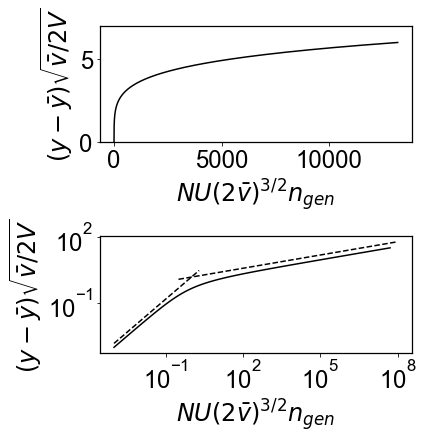

In [3]:
plt.close("all")
fig,axis = plt.subplots(2,1,figsize = (6,6))

i = 0
x = np.linspace(0,6,300)
ts = T(x) - T(x[0])
axis[i].plot(ts,x,'k-')
axis[i].set_xlabel(r"$NU(2\bar{v})^{3/2}n_{gen}$",fontsize = 24)
axis[i].set_ylabel(r"$(y - \bar{y})\sqrt{\bar{v}/2V}$",fontsize = 24)
axis[i].set_ylim(x[0],x[-1]+1)
i= 1
x = np.logspace(-3,1.5,100)
ts = T(x) - T(0)

s1 = np.logspace(-3,0.3,100)
s2 = np.logspace(-.5,8,100)
axis[i].loglog(s1,1.5*s1,'k--')
axis[i].loglog(s2,1.5*s2**(0.2),'k--')
axis[i].loglog(ts,x,'k-')
axis[i].set_xlabel(r"$NU(2\bar{v})^{3/2}n_{gen}$",fontsize = 24)
axis[i].set_ylabel(r"$(y - \bar{y})\sqrt{\bar{v}/2V}$",fontsize = 24)


for i in range(2):
    axis[i].tick_params(labelsize = 24)
    axis[i].spines['top'].set_linewidth(1.25)
    axis[i].spines['left'].set_linewidth(1.25)
    axis[i].spines['bottom'].set_linewidth(1.25)
    axis[i].spines['right'].set_linewidth(1.25)
fig.tight_layout()
fig.savefig("./RandomQTL_Plots/fitness_traj_model.pdf")
plt.show()

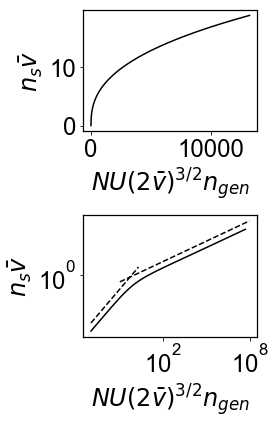

In [4]:
plt.close("all")
fig,axis = plt.subplots(2,1,figsize = (4,6))

i = 0
x = np.linspace(0,6,300)
ts = T(x) - T(x[0])
ns = N(x) - N(x[0])
axis[i].plot(ts,ns,'k-')
axis[i].set_xlabel(r"$NU(2\bar{v})^{3/2}n_{gen}$",fontsize = 24)
axis[i].set_ylabel(r"$n_s\bar{v}$",fontsize = 24)

i= 1
x = np.logspace(-3,1.5,100)
ts = T(x) - T(0)
ns = N(x)
s1 = np.logspace(-3,0.3,100)
s2 = np.logspace(-1,8,100)
axis[i].loglog(ts,ns,'k-')
axis[i].loglog(s1,1.5*s1,'k--')
axis[i].loglog(s2,s2**(0.4),'k--')
axis[i].set_xlabel(r"$NU(2\bar{v})^{3/2}n_{gen}$",fontsize = 24)
axis[i].set_ylabel(r"$n_s\bar{v}$",fontsize = 24)

for i in range(2):
    axis[i].tick_params(labelsize = 24)
    axis[i].spines['top'].set_linewidth(1.25)
    axis[i].spines['left'].set_linewidth(1.25)
    axis[i].spines['bottom'].set_linewidth(1.25)
    axis[i].spines['right'].set_linewidth(1.25)
fig.tight_layout()
fig.savefig("./RandomQTL_Plots/substitution_traj_model.pdf")
plt.show()

In [5]:
#Simulate evolutionary dynamics

from scipy.stats import gamma

def Ufix(K,vbar,x):
    temp = np.sqrt(1+x**2)*(x+ np.sqrt(1+x**2))**2
    return K*np.sqrt(vbar**3)/temp

def draw_dt(K,vbar,x):
    rate = Ufix(K,vbar,x)
    return gamma.rvs(1,size = len(x))/rate

def draw_dx(vbar,x):
    return gamma.rvs(2,size=len(x))*vbar/(x + np.sqrt(1+x**2))

def slice_at_t(t,ts,xs):
    belowts_ind = np.argmin(np.abs(t-ts[ts < t]))
    abovets_ind = np.argmin(np.abs(t-ts[ts > t]))
    

In [6]:
#Simulate evolutionary dynamics

x0 = 0
ntrajs = 1000
nsteps = 100
xs =  np.zeros((nsteps, ntrajs))
xs[0] = x0*np.ones(ntrajs)
ts = np.zeros((nsteps, ntrajs))

K = 5e-2
vbar = 0.05

for i in range(1,nsteps):
    xs[i] = xs[i-1] + draw_dx(vbar,xs[i-1])
    ts[i] = ts[i-1] + draw_dt(K,vbar,xs[i-1])
    
from scipy.interpolate import interp1d

interps = []
for i in range(ntrajs):
    interps += [interp1d(ts[:,i],xs[:,i])]


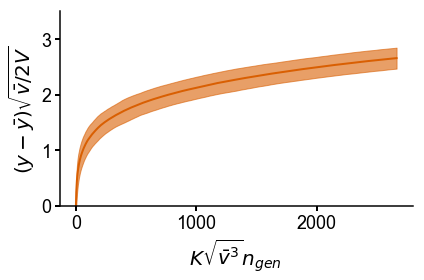

In [7]:
#Adaptation curve

plt.rc('axes', prop_cycle=(cycler('color', palettable.colorbrewer.qualitative.Dark2_8.mpl_colors)))


xpred = np.linspace(np.min(xs),4,300)
tpred = T(xpred) - T(xpred[0])


tnew = np.linspace(0,np.min(ts[-1]),1000)
xsnew = np.zeros((len(tnew),ntrajs))

for i in range(ntrajs):
    xsnew[:,i] = interps[i](tnew)

mean_xnew = np.mean(xsnew,axis=1)
std_xnew = np.std(xsnew,axis=1)

plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,4))

axis.plot(K*np.sqrt(vbar**3)*tnew,mean_xnew, 'C1-', lw = 2)
axis.fill_between(K*np.sqrt(vbar**3)*tnew,y1= mean_xnew + 2*std_xnew, y2 = mean_xnew - 2*std_xnew, color = 'C1', alpha = 0.6)
axis.set_ylim(x0,np.max(mean_xnew)+0.5)

#axis.plot(tpred*10,xpred,'k--', lw = 3)    
axis.tick_params(labelsize = 18, width = 2, size = 5)
axis.set_xticks([0,1000,2000])
axis.set_ylim(0,3.5)
#axis.set_xlim(-100,2700)
axis.spines['top'].set_linewidth(0)
axis.spines['left'].set_linewidth(1.5)
axis.spines['bottom'].set_linewidth(1.5)
axis.spines['right'].set_linewidth(0)

axis.set_ylabel(r"$(y - \bar{y})\sqrt{\bar{v}/2V}$",fontsize = 20)
axis.set_xlabel(r"$K \sqrt{\bar{v}^3}n_{gen}$ ",fontsize = 20)
fig.tight_layout()
fig.savefig("./RandomQTL_Plots/fitness_traj_sim.pdf")

plt.show()

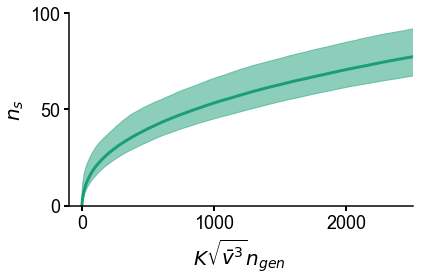

In [8]:
#Number of substitutions

plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,4))

mean_ts = K*np.sqrt(vbar**3)*np.mean(ts,axis=1)
std_ts = K*np.sqrt(vbar**3)*np.std(ts,axis=1)

axis.plot(mean_ts,np.arange(nsteps),'C0-', lw= 3)
axis.fill_betweenx(np.arange(nsteps),x1= mean_ts + 2*std_ts, x2 = mean_ts - 2*std_ts, color = 'C0', alpha = 0.5)


axis.tick_params(labelsize = 18, width = 2, size = 5)

axis.spines['top'].set_linewidth(0)
axis.spines['left'].set_linewidth(1.5)
axis.spines['bottom'].set_linewidth(1.5)
axis.spines['right'].set_linewidth(0)

axis.set_ylabel(r"$n_{s}$",fontsize = 20)
axis.set_xlabel(r"$K \sqrt{\bar{v}^3}n_{gen}$ ",fontsize = 20)
axis.set_ylim(0,100)
axis.set_xlim(-100,2500)
axis.set_xticks([0,1000,2000])
axis.set_yticks([0,50,100])
fig.tight_layout()
fig.savefig("./RandomQTL_Plots/substitution_traj_sim.pdf")
plt.show()

In [9]:
#Simulate evolutionary dynamics for insets

x0 = 0
ntrajs = 500
nsteps = 20000
xs =  np.zeros((nsteps, ntrajs))
xs[0] = x0*np.ones(ntrajs)
ts = np.zeros((nsteps, ntrajs))

K = 5e-2
vbar = 0.05

for i in range(1,nsteps):
    xs[i] = xs[i-1] + draw_dx(vbar,xs[i-1])
    ts[i] = ts[i-1] + draw_dt(K,vbar,xs[i-1])
    
from scipy.interpolate import interp1d

interps = []
for i in range(ntrajs):
    interps += [interp1d(ts[:,i],xs[:,i])]
    


In [10]:
tnew = np.logspace(0,10.5,300000)
xsnew = np.zeros((len(tnew),ntrajs))

for i in range(ntrajs):
    xsnew[:,i] = interps[i](tnew)

mean_xnew = np.mean(xsnew,axis=1)
std_xnew = np.std(xsnew,axis=1)

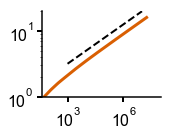

In [11]:
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (2.5,2))

axis.loglog(K*np.sqrt(vbar**3)*tnew[:], mean_xnew[:], 'C1-', lw = 3)
s1 = np.logspace(3,7,100)
axis.loglog(s1,0.8*s1**(0.2),'k--', lw = 2)
s2 = np.logspace(0.1,1,100)
#axis.loglog(s2,0.1*s2**1,'k--')

axis.set_xlim(40,1e8)
axis.set_ylim(1,2e1)
axis.set_yticks([1,10])
axis.set_xticks([1e3,1e6])
axis.tick_params(labelsize = 16, width = 2, size = 5)

axis.spines['top'].set_linewidth(0)
axis.spines['left'].set_linewidth(1.5)
axis.spines['bottom'].set_linewidth(1.5)
axis.spines['right'].set_linewidth(0)
fig.tight_layout()
fig.savefig("./RandomQTL_Plots/fitness_traj_sim_inset.pdf")
plt.show()

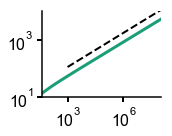

In [12]:
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (2.5,2))


mean_ts = K*np.sqrt(vbar**3)*np.mean(ts,axis=1)

axis.loglog(mean_ts,np.arange(nsteps),'C0-', lw= 3)

s1 = np.logspace(3,8,100)
axis.loglog(s1,7*s1**(0.4),'k--', lw = 2)
s2 = np.logspace(0.1,1,100)
#axis.loglog(s2,0.1*s2**1,'k--')

axis.set_xlim(40,1e8)
axis.set_ylim(1e1,1e4)
axis.set_yticks([1e1,1e3])
axis.set_xticks([1e3,1e6])
axis.tick_params(labelsize = 16, width = 2, size = 5)

axis.spines['top'].set_linewidth(0)
axis.spines['left'].set_linewidth(1.5)
axis.spines['bottom'].set_linewidth(1.5)
axis.spines['right'].set_linewidth(0)
fig.tight_layout()
fig.savefig("./RandomQTL_Plots/substitution_traj_sim_inset.pdf")
plt.show()